차원 축소

머신러닝의 한 부분으로 많은 특징들이 들어있는 큰 데이터 세트를 다룰 때는

차원을 축소해서 복잡함을 줄여주는 것이 목적이다.



주성분 분석은 존재하는 특징을 기반으로 새로 추출된 특징을 생성하는 것이다.

도수, 산도, 고객 세분화

클러스터링을 통해 고객들의 다양한 분류를 식별

3가지 식별에 성공을 했는데

더 적은 양의 톡징을 통해 데이터 세트의 복잡성을 감소시키고 싶어한다.

새로운 와인이 들어오면 어떤 고객에게 판촉을 할지 예측하자.

LDA: supervised learning
데이터의 클래스의 차이가 분산보다 평균의 차이에 있을 때, LDA는 PCA보다 뛰어난 성능을 보여준다.
3D plot으로 데이터를 표현할 때, LDA는 PCA보다 뛰어난 성능을 보여준다.

PCA: unsupervised learning
데이터의 클래스의 차이가 평균보다 분산의 차이에 있을 때, PCA는 LDA보다 뛰어난 성능을 보여준다.

LDA: 분류를 할 때 클래스 내의 분산은 최소가 되도록 하되, 클래스끼리의 분산은 최대가 되도록 한다는 것이다

Kernel PCA: Kernel SVM이 SVM보다 좋은 예측력이 보인 것처럼 Kernel PCA도 잘 나오는지 확인해보자.

In [3]:
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
# 세트 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 주성분 분석

In [5]:
# 스케일링 작업
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 몇개의 피쳐로 데이터 차원 줄일건지 
# fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [7]:
# PCA된 데이터의 컬럼명을 PC1, PC2로 한다.
pca_columns=['PC1','PC2']
X_train_pca = pd.DataFrame(X_train ,columns=pca_columns)
X_train_pca['target']=dataset.Customer_Segment
display(X_train_pca.tail())

# 주성분 분석 이후 평균/표준편차 확인 
display(X_train_pca.describe())
pca.explained_variance_ratio_

,PC1,PC2,target
137,-0.501012,2.684532,3
138,0.330454,2.433962,3
139,0.010973,1.995855,3
140,2.891767,-0.771555,3
141,-2.448304,-2.113603,3


,PC1,PC2,target
count,1.420000e+02,1.420000e+02,142.000000
mean,-6.254778e-18,-4.691083e-17,1.669014
std,2.197485e+00,1.590347e+00,0.627071
min,-3.844170e+00,-3.539066e+00,1.000000
25%,-2.280169e+00,-1.301042e+00,1.000000
50%,3.230706e-02,-2.429433e-01,2.000000
75%,1.970072e+00,1.355095e+00,2.000000
max,4.354131e+00,3.809075e+00,3.000000


array([0.36884109, 0.19318394])

두 개의 주성분이 전체 분산의 약 57%를 설명한다.

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# 결과

### 혼동행렬

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

1번에서 1개만 오분류난것을 볼 수 있다.


PCA를 함으로써 성능을 높이는 것 보다는 어느 정도 성능을 유지하면서 연산 속도를 높이는 것에 의의를 두는 것이 좋다.

즉, 세트가 많을 때, 유사한 성능을 보이면서 빠르게 데이터를 분석할 수 있는 방향으로 가야 할 것 같다.

### 시각화

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


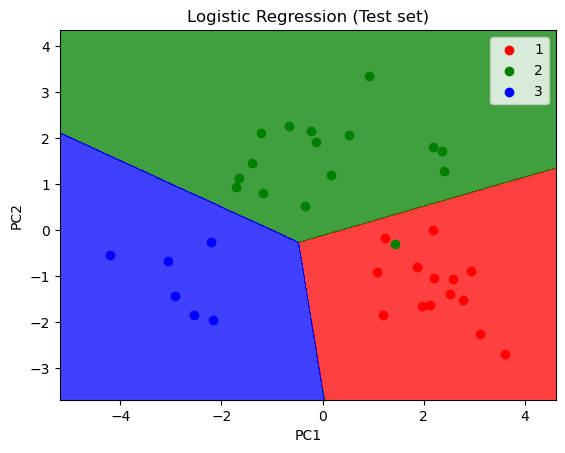

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

3가지의 예측 영역으로 나눠져 있다.

파란 영역: 고객 세분화 3
    
초록 영역: 고객 세분화 2
    
빨간 영역: 고객 세분화 1

틀린 예측이 한 가지 있는 걸 볼 수 있다.

다른 분석을 통해 예측력을 높여보자.